# Kaggle Titanic Competition
Dataset: https://www.kaggle.com/c/titanic/data \n
My first mini data science project, done as a tutorial referencing https://medium.freecodecamp.org/how-to-get-started-with-machine-learning-in-less-than-10-minutes-b5ea68462d23

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Clean Data

### Training Data

In [321]:
# load data
train_df = pd.read_csv("train.csv")
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


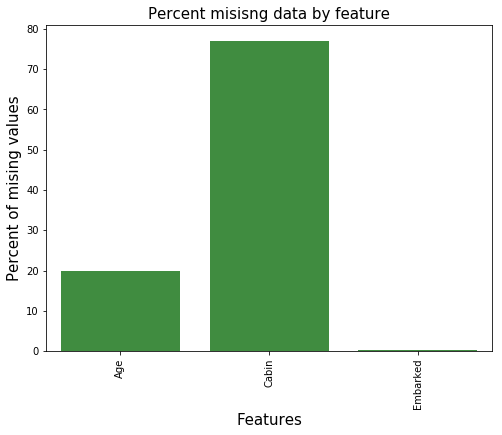

In [322]:
def missing_data(data):
    # play around with pd
    total_null = data.isnull().sum().sort_values(ascending=False)
    if not total_null.any():
        print("No missing data!")
        return
    percent_null = (total_null / data.isnull().count() * 100)
    missing = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
    # only get rows that have more than 0.0% missing entries 
    missing = missing[missing["Percent"] > 0]
    # plot
    f, ax = plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(missing.index, missing["Percent"], color="green", alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of mising values', fontsize=15)
    plt.title('Percent misisng data by feature', fontsize=15)
missing_data(train_df)

In [323]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df.drop(['Cabin'], axis=1, inplace=True)

In [324]:
missing_data(train_df)
print(train_df.isnull().sum())
train_df.head()

No missing data!
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Feature Engineering

In [325]:
# Family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [326]:
# Title of passenger (Mr., Mrs., etc.)
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
train_df['Title'] = train_df['Name'].apply(get_title)

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
print(train_df['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64


In [327]:
# Bin age in to groups
train_df['Age_bin'] = pd.cut(train_df['Age'],
                             bins=[0, 14, 20, 40, 120],
                             labels=['Children', 'Teenage', 'Adult', 'Elder'])

In [328]:
# bin ticket fare
train_df['Fare_bin'] = pd.cut(train_df['Fare'], 4,
                             labels=['Low_fare', 'Medium_fare', 'High_fare', 'Highest_fare'])
pd.cut(train_df['Fare'], 4).head()

0    (-0.512, 128.082]
1    (-0.512, 128.082]
2    (-0.512, 128.082]
3    (-0.512, 128.082]
4    (-0.512, 128.082]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [329]:
# drop columns used in feature engineering
drop_columns = ['SibSp', 'Parch', 'Age', 'Fare']
train_df.drop(drop_columns, axis='columns', inplace=True)

In [330]:
# drop irrelevant columns
drop_columns = ['PassengerId', 'Ticket', 'Name']
train_df.drop(drop_columns, axis='columns', inplace=True)

In [331]:
# generate indicator variables for categorical variables
train_df = pd.get_dummies(train_df,
                          columns=['Embarked', 'Sex', 'Title', 'Age_bin', 'Fare_bin'])

In [332]:
train_df.head()

,Survived,Pclass,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,...,Title_Mrs,Title_Rare,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Fare_bin_Low_fare,Fare_bin_Medium_fare,Fare_bin_High_fare,Fare_bin_Highest_fare
0,0,3,2,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,2,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,1,3,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,1,1,2,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,3,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


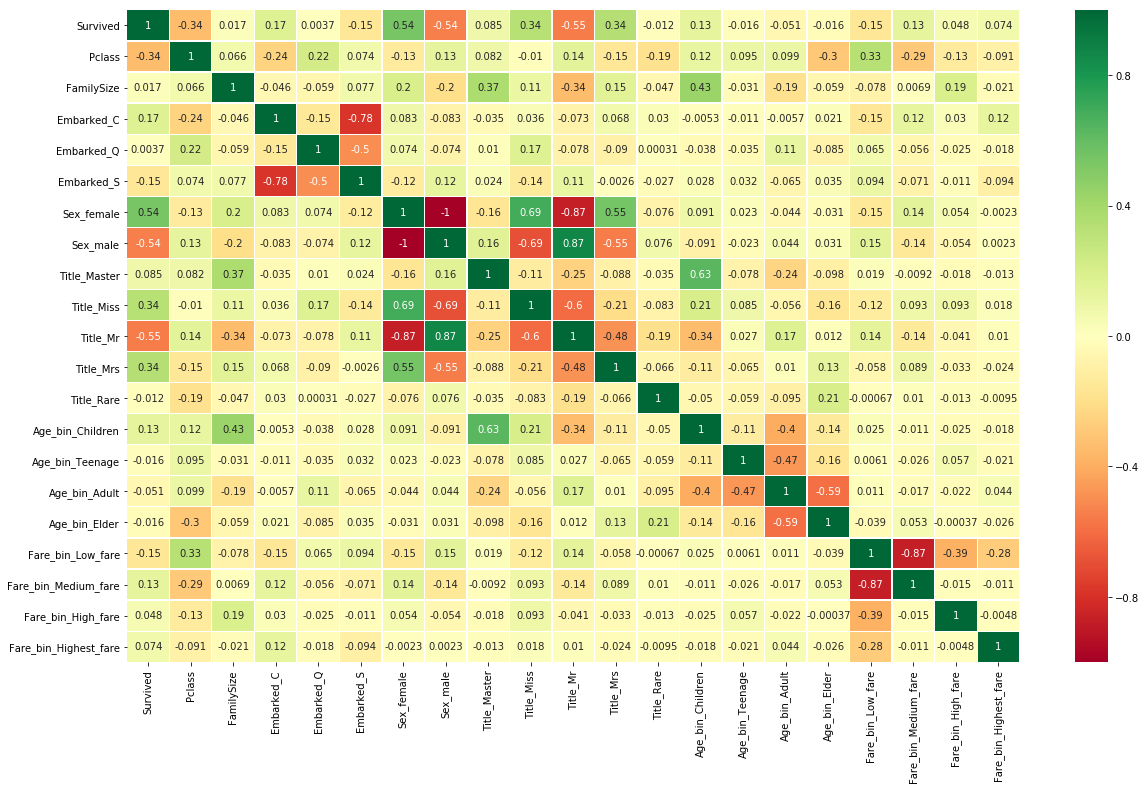

In [333]:
# Heatmap to view feature correlation
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20, 12)
plt.show()

## ML Modeling

In [334]:
from sklearn import model_selection
from sklearn import metrics

# Get training and test data
all_features = train_df.drop('Survived', axis=1)
target_feature = train_df['Survived']
x_train, x_test, y_train, y_test = model_selection.train_test_split(all_features, target_feature,
                                                                    test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((623, 20), (268, 20), (623,), (268,))

In [335]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(criterion='gini', n_estimators=700, min_samples_split=10,
                                        min_samples_leaf=1, max_features='auto', oob_score=True,
                                        random_state=1, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

### Evaluate Model Results

In [336]:
prediction_rm = model.predict(x_test)
print("Accuracy of Random Forest Classifier is: %0.3f" % metrics.accuracy_score(prediction_rm, y_test))

Accuracy of Random Forest Classifier is: 0.810


#### Using k-fold cross validation
Helps us gain a less biased estimate of model skill without using classic train/test split.

In [337]:
kfold = model_selection.KFold(n_splits=10, random_state=22)  # split data into 10 equal parts
result_rm = model_selection.cross_val_score(model, all_features, target_feature, cv=10, scoring='accuracy')
print("Cross Validated Score for Random Forest Classifier is: %0.3f" % result_rm.mean())

Cross Validated Score for Random Forest Classifier is: 0.818


#### Confusion matrix

In [338]:
y_pred = model_selection.cross_val_predict(model, all_features, target_feature, cv=10)

Text(0.5, 1.05, 'Confusion Matrix')

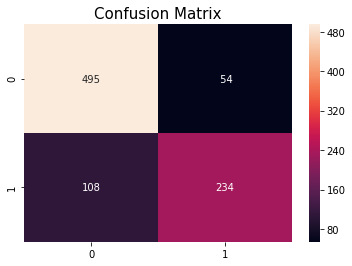

In [339]:
sns.heatmap(metrics.confusion_matrix(target_feature, y_pred), annot=True, fmt='3.0f')
plt.title('Confusion Matrix', y=1.05, size=15)

### Optimization (RFC using GridSearch)

In [340]:
model = ensemble.RandomForestClassifier()
n_estim = range(100, 1000, 50)

param_grid = {'n_estimators': n_estim}
model_rf = model_selection.GridSearchCV(model, param_grid = param_grid, cv=5,
                                        scoring="accuracy", n_jobs=4, verbose=1)
model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   12.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': range(100, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [341]:
print('Best score: %0.3f' % model_rf.best_score_)
print('Best estimator:\n %s' % model_rf.best_estimator_)

Best score: 0.820
Best estimator:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
